# Proyecto Machine Learning  - The Bridge - Joaquín Villar 🚀

# Análisis de Préstamos - Declaración del Problema 📊
---------
## Introducción 📑
Las empresas del sector financiero especializadas en préstamos ofrecen diversas soluciones de financiamiento a sus clientes. Estas compañías enfrentan un desafío clave: evaluar la solvencia de los solicitantes para minimizar el riesgo de impago.

Este caso de estudio proporcionará una visión sobre cómo se abordan problemas empresariales reales mediante Análisis Exploratorio de Datos (EDA) y Machine Learning. Además, permitirá desarrollar una comprensión básica de la analítica de riesgos en el sector bancario y financiero, y cómo los datos pueden utilizarse para reducir las pérdidas en la concesión de préstamos.

-----------
## Entendimiento del Negocio 📝
Trabajas en una empresa de préstamos que debe decidir si aprueba o no una solicitud en función del perfil del solicitante. Esta decisión implica dos riesgos principales:
- Pérdida de negocio: Si el solicitante tiene capacidad para pagar el préstamo, pero su solicitud es rechazada, la empresa pierde una oportunidad de generar ingresos.
- Pérdida financiera: Si el solicitante no tiene capacidad para pagar y se aprueba el préstamo, la empresa sufre una pérdida económica.

El conjunto de datos proporcionado contiene información sobre solicitantes de préstamos anteriores y si incumplieron o no con sus pagos. El objetivo es identificar patrones que indiquen la probabilidad de que una persona no pague su préstamo. Esta información permitirá tomar decisiones como:
- Negar la solicitud de préstamo.
- Reducir el monto del préstamo.
- Ofrecer el préstamo con una tasa de interés más alta a solicitantes de alto riesgo.

## Tipos de decisiones al evaluar una solicitud de préstamo 💰
1. Préstamo aprobado: Si la empresa aprueba la solicitud, pueden darse tres escenarios:
- Totalmente pagado: El solicitante ha cumplido con el pago total del préstamo (capital e intereses).
- En proceso de pago: El solicitante sigue pagando sus cuotas, pero aún no ha completado el período del préstamo. Estos clientes no se consideran incumplidores.
- Incumplimiento (Charged-off): El solicitante no ha realizado los pagos en el tiempo estipulado durante un período prolongado, lo que indica un incumplimiento del préstamo.

2. Préstamo rechazado: Si la empresa decide no otorgar el préstamo, no existe historial de transacciones para estos solicitantes, por lo que estos datos no están disponibles en el conjunto de datos.
----------------
## Objetivos del Negocio 🎯
Las empresas del sector financiero buscan facilitar préstamos personales, comerciales y financiamiento para diversos fines a través de plataformas ágiles y digitales. Sin embargo, como en cualquier empresa de préstamos, otorgar créditos a solicitantes de alto riesgo es una de las principales fuentes de pérdidas financieras, conocidas como pérdidas crediticias.

Estas pérdidas ocurren cuando un prestatario no paga su deuda, generando un impacto negativo en la empresa. En este caso, los clientes etiquetados como "charged-off" representan a los incumplidores que generan la mayor cantidad de pérdidas.

El objetivo principal del análisis es identificar a los clientes de alto riesgo para reducir la cantidad de préstamos otorgados a estos perfiles y minimizar las pérdidas crediticias. Esto se logrará utilizando técnicas de Análisis Exploratorio de Datos (EDA) y Machine Learning.

En otras palabras, la empresa busca comprender los factores que impulsan el incumplimiento de pagos, es decir, las variables clave que predicen si un solicitante es propenso a no pagar su préstamo. Este conocimiento se utilizará para mejorar la evaluación de riesgos y la gestión de la cartera de préstamos.·

--------------

# 1. Carga de datos

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import bootcampviztools as bt

import warnings 
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv("../data_sample/lending_club_loan_two.csv")

In [6]:
df = data.copy()

In [7]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

## Descripción de las Columnas del Dataset
| #  | Columna                  | Descripción                                                                                                                                 | Tipo        |
|----|--------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|-------------|
| 0  | `loan_amnt`              | El monto del préstamo solicitado por el cliente. Si el monto del préstamo es reducido por el departamento de crédito, se reflejará aquí.   | numérico    |
| 1  | `term`                   | El número de pagos del préstamo. Los valores son en meses y pueden ser 36 o 60.                                                               | numérico    |
| 2  | `int_rate`               | Tasa de interés del préstamo.                                                                                                                 | numérico    |
| 3  | `installment`            | El pago mensual que debe realizar el cliente si el préstamo se origina.                                                                  | numérico    |
| 4  | `grade`                  | Grado asignado al préstamo por la entidad.                                                                                                           | texto       |
| 5  | `sub_grade`              | Subgrado asignado al préstamo por la entidad.                                                                                                        | texto       |
| 6  | `emp_title`              | El título del trabajo proporcionado por el cliente al solicitar el préstamo.                                                             | texto       |
| 7  | `emp_length`             | La duración del empleo en años. Los valores posibles van de 0 a 10, donde 0 significa menos de un año y 10 significa diez o más años.         | numérico    |
| 8  | `home_ownership`         | El estado de propiedad de la vivienda proporcionado por el cliente.                      | texto       |
| 9  | `annual_inc`             | El ingreso anual proporcionado por el cliente.                                                              | numérico    |
| 10 | `verification_status`    | Indica si el ingreso fue verificado por la entidad, no verificado, o si la fuente de ingreso fue verificada.                                          | texto       |
| 11 | `issue_d`                | El mes en el que se financió el préstamo.                                                                                                     | fecha       |
| 12 | `loan_status`            | El estado actual del préstamo. (0: Charged Off, 1: Fully Paid)                                                                                                                | texto       |
| 13 | `purpose`                | Una categoría proporcionada por el cliente para la solicitud del préstamo.                                                                | texto       |
| 14 | `title`                  | El título del préstamo proporcionado por el cliente.                                                                                     | texto       |
| 15 | `zip_code`               | Los primeros 3 números del código postal proporcionado por el cliente en la solicitud del préstamo.                                       | texto       |
| 16 | `addr_state`             | El estado proporcionado por el cliente en la solicitud del préstamo.                                                                     | texto       |
| 17 | `dti`                    | Una proporción calculada usando los pagos mensuales totales de deuda sobre las obligaciones totales de deuda, excluyendo el préstamo.       | numérico    |
| 18 | `earliest_cr_line`       | El mes en que se abrió la línea de crédito más antigua reportada del cliente.                                                              | fecha       |
| 19 | `open_acc`               | El número de líneas de crédito abiertas por el cliente.                                                             | numérico    |
| 20 | `pub_rec`                | Número de registros públicos negativos.                                                                                                       | numérico    |
| 21 | `revol_bal`              | El saldo total del crédito resuelto.                                                                                                         | numérico    |
| 22 | `revol_util`             | La tasa de utilización de la línea del crédito resuelto, es decir, la cantidad de crédito que el cliente está utilizando en relación con el crédito disponible. | numérico    |
| 23 | `total_acc`              | El número total de líneas de crédito actualmente en el archivo de créditos del cliente.                                                    | numérico    |
| 24 | `initial_list_status`    | El estado inicial de listado del préstamo. Los valores posibles son: W, F.                                                                    | texto       |
| 25 | `application_type`       | Indica si el préstamo es una solicitud individual o una solicitud conjunta con dos co-prestatarios.                                           | texto       |
| 26 | `mort_acc`               | Número de cuentas hipotecarias.                                                                                                               | numérico    |
| 27 | `pub_rec_bankruptcies`   | Número de quiebras en registros públicos.                                                                                                     | numérico    |
| 28 | `address`                | Dirección proporcionada por el cliente en la solicitud del préstamo.                                                                     | texto       |


# 2. Problema de Machine Learning: Clasificación
Buscamos predecir el estado del préstamo, que corresponde a la columna "loan_status" (0: préstamo incobrable , 1: préstamo pagado o en proceso de pago). Se trata de un problema de **Clasificación Binaria**.

# 3. Análisis de la Distribución del Target

In [9]:
target = "loan_status"

In [10]:
df[target].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

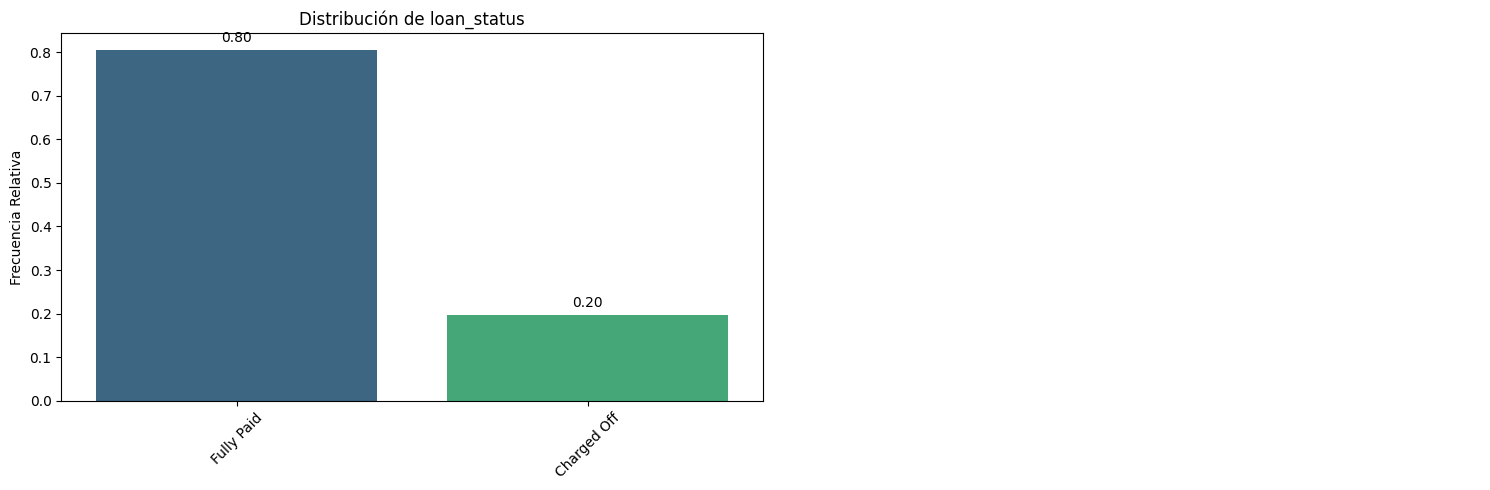

In [11]:
bt.pinta_distribucion_categoricas(df, [target], relativa=True, mostrar_valores= True)

Target desbalanceado, aplicaremos técnica oversampling sobre la clase minoritaria.

# 4. Comprensión de Variables

In [12]:
def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)


    return concatenado.T
        
data_report(df).T

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
COL_N,,,,
loan_amnt,float64,0.0,1397,0.35
term,object,0.0,2,0.0
int_rate,float64,0.0,566,0.14
installment,float64,0.0,55706,14.07
grade,object,0.0,7,0.0
sub_grade,object,0.0,35,0.01
emp_title,object,5.79,173105,43.71
emp_length,object,4.62,11,0.0
home_ownership,object,0.0,6,0.0


In [13]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


## 4.1. Limpieza y transformación - ETL

In [14]:
df["loan_amnt_cat"] = pd.cut(df["loan_amnt"],
                          bins=[0, 8000, 12000, 20000, 30000, np.inf],
                          labels=[1, 2, 3, 4, 5])

df["loan_amnt_cat"] = df["loan_amnt_cat"].astype(object, errors='ignore')

In [15]:
emp_length_dic = {
    "10+ years": 10,
    "< 1 year": 0,
    "1 year": 1,
    "2 years": 2,
    "3 years": 3,
    "4 years": 4,
    "5 years": 5,
    "6 years": 6,
    "7 years": 7,
    "8 years": 8,
    "9 years": 9
}

df["emp_length"] = df["emp_length"].map(emp_length_dic)

In [16]:
df["annual_income_cat"] = pd.cut(df["annual_inc"],
                          bins=[0, 45000, 64000, 90000, 200000, np.inf],
                          labels=[1, 2, 3, 4, 5])

df["annual_income_cat"] = df["annual_income_cat"].astype(object, errors='ignore')

In [17]:
df["issue_d"] = pd.to_datetime(df["issue_d"], format="%b-%Y")

In [18]:
# Convertir columna objetivo en binaria
loan_status_binario = {'Fully Paid': 1, 'Charged Off': 0} 
df[target] = df[target].map(loan_status_binario).astype(int, errors='ignore')

In [19]:
df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"], format="%b-%Y")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  object        
 2   int_rate              396030 non-null  float64       
 3   installment           396030 non-null  float64       
 4   grade                 396030 non-null  object        
 5   sub_grade             396030 non-null  object        
 6   emp_title             373103 non-null  object        
 7   emp_length            377729 non-null  float64       
 8   home_ownership        396030 non-null  object        
 9   annual_inc            396030 non-null  float64       
 10  verification_status   396030 non-null  object        
 11  issue_d               396030 non-null  datetime64[ns]
 12  loan_status           396030 non-null  int32         
 13 

# 5. Feature Red. Preliminar

## 5.1. Features Repetidas

In [21]:
df = df.drop(columns=["annual_inc"])
df = df.drop(columns=["loan_amnt"])
df = df.drop(columns=["issue_d"])
df = df.drop(columns=["title"])
df = df.drop(columns=["earliest_cr_line"])

## 5.2. Identificadores/Columnas Únicas

In [22]:
df = df.drop(columns=["address"])

## 5.3. Feature selection
### 5.3.1. Correlación Lineal

In [23]:
numeric_cols = df.select_dtypes(include=["int32" , "int64" , "float64"]).columns
numeric_cols

Index(['int_rate', 'installment', 'emp_length', 'loan_status', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [24]:
corr = np.abs(df[numeric_cols].corr()[target]).sort_values(ascending=False)
corr

loan_status             1.000000
int_rate                0.247758
revol_util              0.082373
mort_acc                0.073111
dti                     0.062413
installment             0.041082
open_acc                0.028012
pub_rec                 0.019933
total_acc               0.017893
emp_length              0.013734
revol_bal               0.010892
pub_rec_bankruptcies    0.009383
Name: loan_status, dtype: float64

In [25]:
good_corr_feat = corr[corr > 0.05].index.values # Guardar columnas con correlación > 0.05

In [26]:
bad_corr_feat = corr[corr < 0.05].index.values # Eliminar variables con correlación < 0.05
df.drop(columns=bad_corr_feat, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   term                 396030 non-null  object 
 1   int_rate             396030 non-null  float64
 2   grade                396030 non-null  object 
 3   sub_grade            396030 non-null  object 
 4   emp_title            373103 non-null  object 
 5   home_ownership       396030 non-null  object 
 6   verification_status  396030 non-null  object 
 7   loan_status          396030 non-null  int32  
 8   purpose              396030 non-null  object 
 9   dti                  396030 non-null  float64
 10  revol_util           395754 non-null  float64
 11  initial_list_status  396030 non-null  object 
 12  application_type     396030 non-null  object 
 13  mort_acc             358235 non-null  float64
 14  loan_amnt_cat        396030 non-null  object 
 15  annual_income_cat

# 6. Análisis Univariante

## 6.1. Variables Categóricas

In [28]:
df[target] = df[target].astype(object, errors='ignore')

In [29]:
cat_cols = df.select_dtypes(include=["object"]).columns
cat_cols

Index(['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'initial_list_status',
       'application_type', 'loan_amnt_cat', 'annual_income_cat'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   term                 396030 non-null  object 
 1   int_rate             396030 non-null  float64
 2   grade                396030 non-null  object 
 3   sub_grade            396030 non-null  object 
 4   emp_title            373103 non-null  object 
 5   home_ownership       396030 non-null  object 
 6   verification_status  396030 non-null  object 
 7   loan_status          396030 non-null  object 
 8   purpose              396030 non-null  object 
 9   dti                  396030 non-null  float64
 10  revol_util           395754 non-null  float64
 11  initial_list_status  396030 non-null  object 
 12  application_type     396030 non-null  object 
 13  mort_acc             358235 non-null  float64
 14  loan_amnt_cat        396030 non-null  object 
 15  annual_income_cat

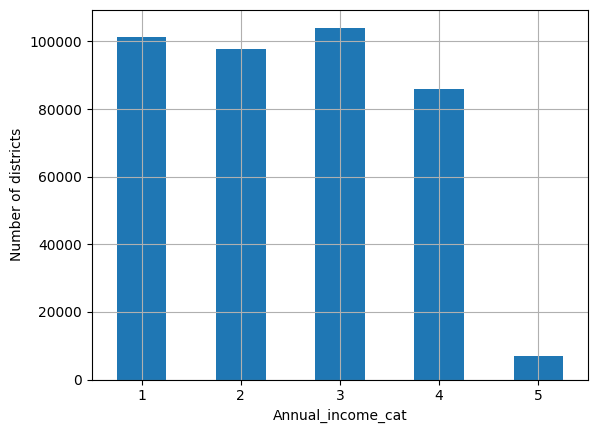

In [31]:
df["annual_income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Annual_income_cat")
plt.ylabel("Number of districts")
plt.show()

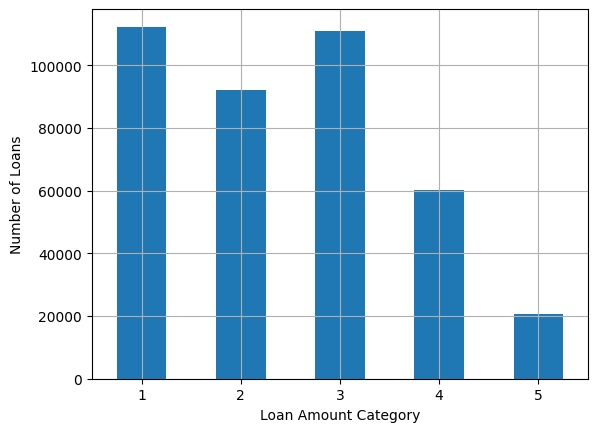

In [32]:
df["loan_amnt_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Loan Amount Category")
plt.ylabel("Number of Loans")
plt.show()

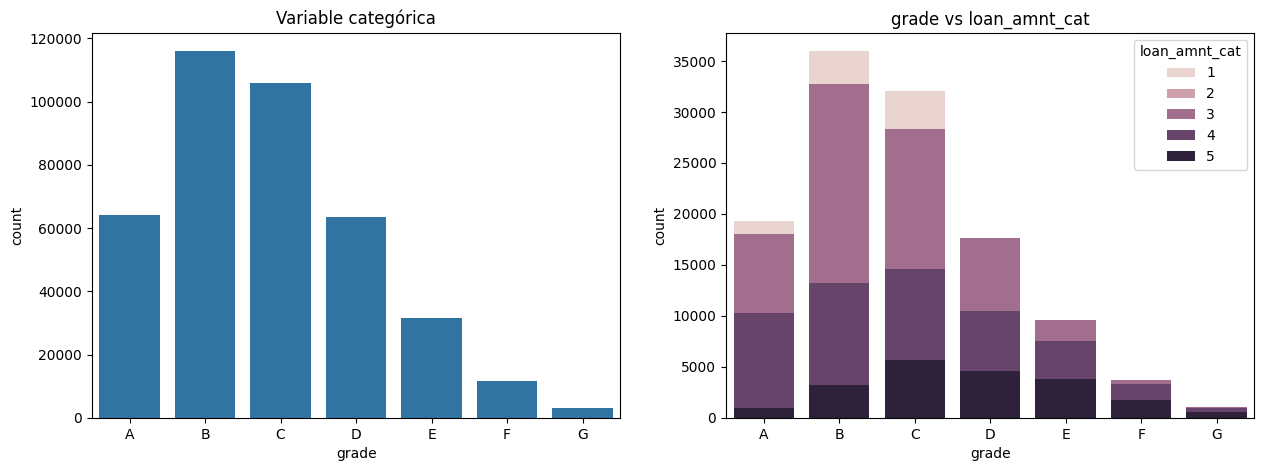

In [33]:
grade_order = ["A", "B", "C", "D", "E", "F", "G"]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Conteo de la variable categórica
sns.countplot(x=df["grade"], order=grade_order, ax=axes[0])
axes[0].set_title("Variable categórica")

# Relación entre grade y loan_amnt_cat
sns.countplot(x=df["grade"], hue=df["loan_amnt_cat"], order=grade_order, ax=axes[1], dodge=False)
axes[1].set_title("grade vs loan_amnt_cat")

plt.show()

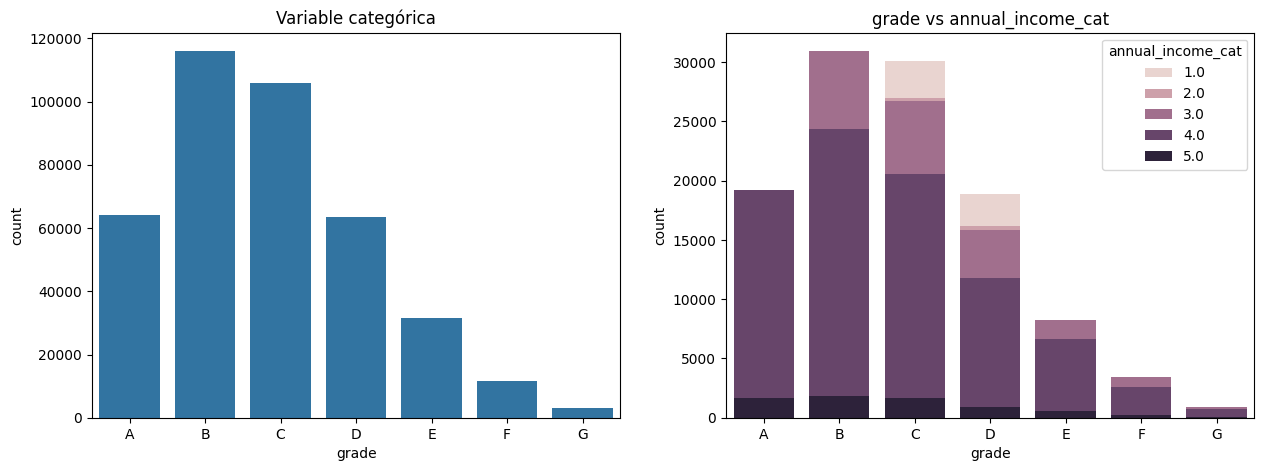

In [34]:
grade_order = ["A", "B", "C", "D", "E", "F", "G"]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Conteo de la variable categórica
sns.countplot(x=df["grade"], order=grade_order, ax=axes[0])
axes[0].set_title("Variable categórica")

# Relación entre grade y annual_income_cat
sns.countplot(x=df["grade"], hue=df["annual_income_cat"], order=grade_order, ax=axes[1], dodge=False)
axes[1].set_title("grade vs annual_income_cat")

plt.show()

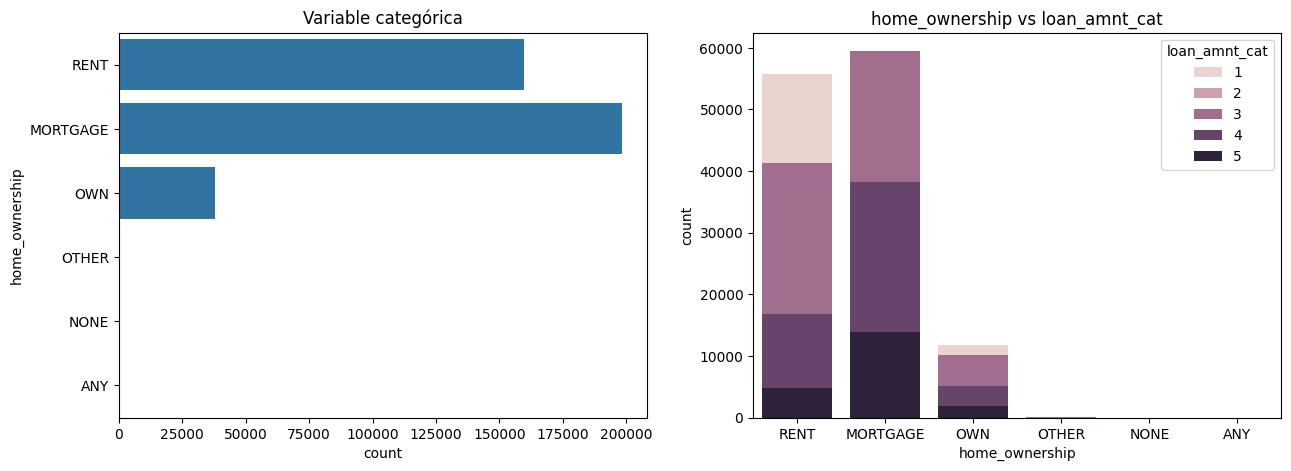

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Conteo de categorica
sns.countplot(df["home_ownership"], ax=axes[0])
axes[0].set_title("Variable categórica")

# Categorica vs target
sns.countplot(x=df["home_ownership"], hue=df["loan_amnt_cat"], ax=axes[1], dodge=False)
axes[1].set_title("home_ownership vs loan_amnt_cat");

## 6.2. Variables Numéricas

In [36]:
features_num = [col for col in good_corr_feat if target not in col]
features_num

['int_rate', 'revol_util', 'mort_acc', 'dti']

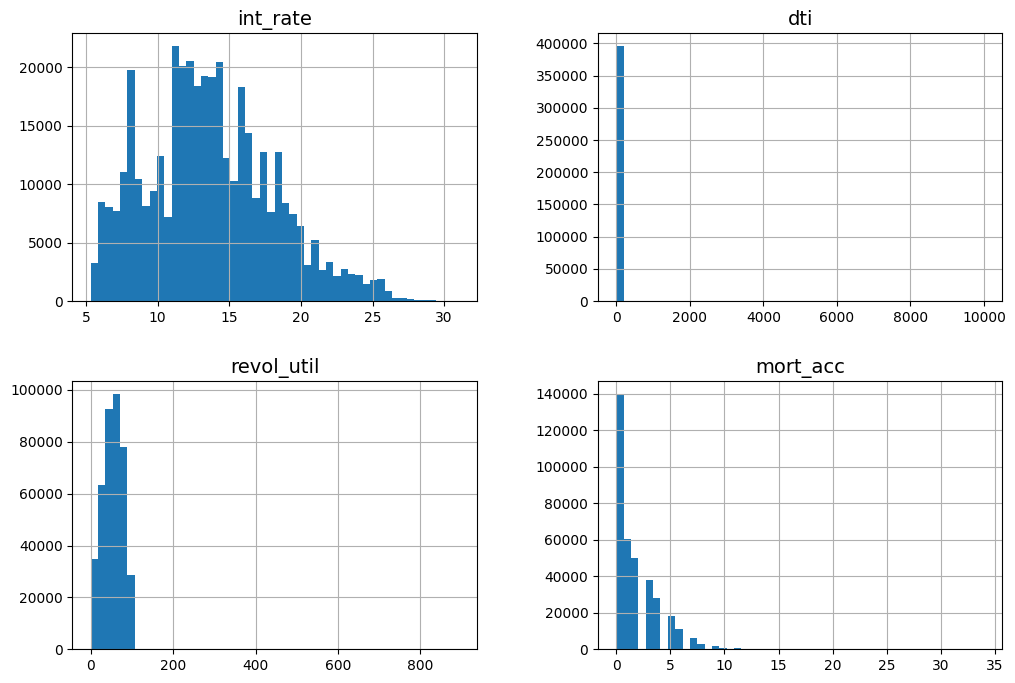

In [37]:
# Código extra para los tamaños de las fuentes y los "ticks" de los ejes, esto no lo vimos al hablar de matplotlib así que una extra
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

array([[<Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'revol_util'}>],
       [<Axes: title={'center': 'mort_acc'}>,
        <Axes: title={'center': 'dti'}>]], dtype=object)

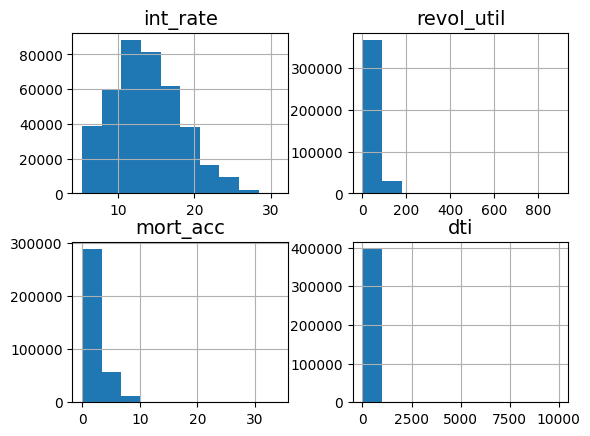

In [38]:
df[features_num].hist()

In [39]:
df[features_num].describe()

,int_rate,revol_util,mort_acc,dti
count,396030.000000,395754.000000,358235.000000,396030.000000
mean,13.639400,53.791749,1.813991,17.379514
std,4.472157,24.452193,2.147930,18.019092
min,5.320000,0.000000,0.000000,0.000000
25%,10.490000,35.800000,0.000000,11.280000
50%,13.330000,54.800000,1.000000,16.910000
75%,16.490000,72.900000,3.000000,22.980000
max,30.990000,892.300000,34.000000,9999.000000


# 7. Análisis Bivariante

## 7.1. Correlation matrix/heatmap con Target

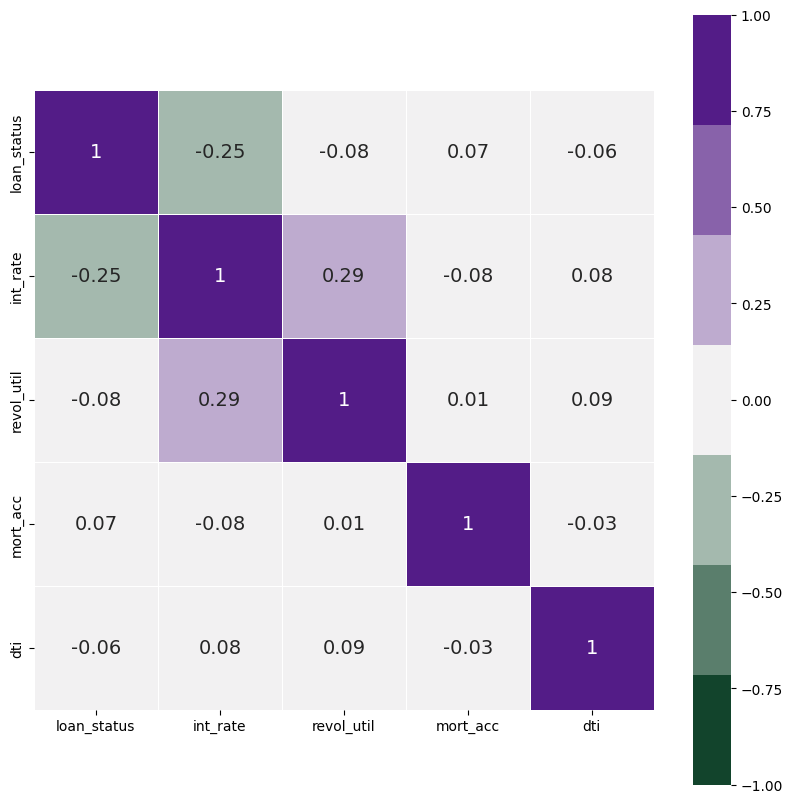

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(df[good_corr_feat].corr(), 2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

## 7.2. Correlation matrix/heatmap sin Target

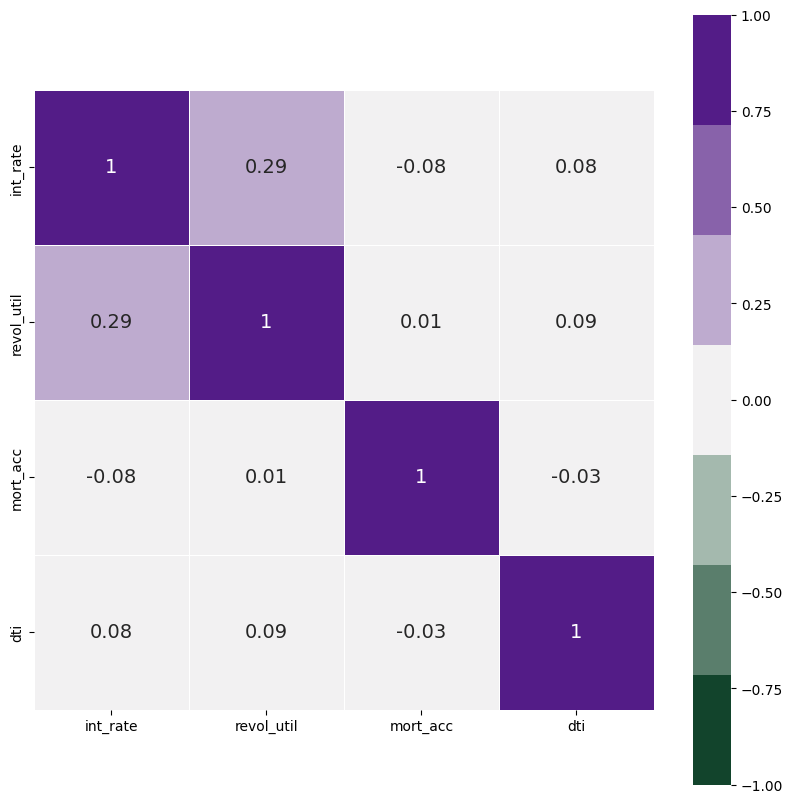

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(df[features_num].corr(), 2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

# 8. Eliminación de features

In [42]:
features_num

['int_rate', 'revol_util', 'mort_acc', 'dti']

In [43]:
features_cat = ["term", "grade", "home_ownership",
       "verification_status", "purpose",
       "initial_list_status", "application_type", "loan_amnt_cat",
       "annual_income_cat"]
features_cat

['term',
 'grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type',
 'loan_amnt_cat',
 'annual_income_cat']

In [44]:
data_report(df[features_num + features_cat])

COL_N,int_rate,revol_util,mort_acc,dti,term,grade,home_ownership,verification_status,purpose,initial_list_status,application_type,loan_amnt_cat,annual_income_cat
DATA_TYPE,float64,float64,float64,float64,object,object,object,object,object,object,object,object,object
MISSINGS (%),0.0,0.07,9.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,566,1226,33,4262,2,7,6,3,14,2,3,5,5
CARDIN (%),0.14,0.31,0.01,1.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 9. Missing

In [45]:
# df_only_features = df[features_num + features_cat].copy()

In [46]:
# df_only_features["loan_status"] = df["loan_status"].copy()

In [47]:
# df = df_only_features.copy()
df

,term,int_rate,grade,sub_grade,emp_title,home_ownership,verification_status,loan_status,purpose,dti,revol_util,initial_list_status,application_type,mort_acc,loan_amnt_cat,annual_income_cat
0,36 months,11.44,B,B4,Marketing,RENT,Not Verified,1,vacation,26.24,41.8,w,INDIVIDUAL,0.0,2,4
1,36 months,11.99,B,B5,Credit analyst,MORTGAGE,Not Verified,1,debt_consolidation,22.05,53.3,f,INDIVIDUAL,3.0,1,3
2,36 months,10.49,B,B3,Statistician,RENT,Source Verified,1,credit_card,12.79,92.2,f,INDIVIDUAL,0.0,3,1
3,36 months,6.49,A,A2,Client Advocate,RENT,Not Verified,1,credit_card,2.60,21.5,f,INDIVIDUAL,0.0,1,2
4,60 months,17.27,C,C5,Destiny Management Inc.,MORTGAGE,Verified,0,credit_card,33.95,69.8,f,INDIVIDUAL,1.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,60 months,10.99,B,B4,licensed bankere,RENT,Source Verified,1,debt_consolidation,15.63,34.3,w,INDIVIDUAL,0.0,2,1
396026,36 months,12.29,C,C1,Agent,MORTGAGE,Source Verified,1,debt_consolidation,21.45,95.7,f,INDIVIDUAL,1.0,4,4
396027,36 months,9.99,B,B1,City Carrier,RENT,Verified,1,debt_consolidation,17.56,66.9,f,INDIVIDUAL,0.0,1,2
396028,60 months,15.31,C,C2,"Gracon Services, Inc",MORTGAGE,Verified,1,debt_consolidation,15.88,53.8,f,INDIVIDUAL,5.0,4,2


In [48]:
df = df[features_num + features_cat]

In [49]:
# Imputar la mediana
df["revol_util"] = df["revol_util"].fillna(df["revol_util"].median())
df["mort_acc"] = df["mort_acc"].fillna(df["mort_acc"].median())

In [50]:
data_report(df)

COL_N,int_rate,revol_util,mort_acc,dti,term,grade,home_ownership,verification_status,purpose,initial_list_status,application_type,loan_amnt_cat,annual_income_cat
DATA_TYPE,float64,float64,float64,float64,object,object,object,object,object,object,object,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,566,1226,33,4262,2,7,6,3,14,2,3,5,5
CARDIN (%),0.14,0.31,0.01,1.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 10. Feature Engineering
## 10.1. Escalados

In [51]:
features_num

['int_rate', 'revol_util', 'mort_acc', 'dti']

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaler.fit(df[features_num]) 
df[features_num] = pd.DataFrame(scaler.transform(df[features_num]), columns = features_num)

In [53]:
df.describe()

,int_rate,revol_util,mort_acc,dti
count,3.960300e+05,3.960300e+05,3.960300e+05,3.960300e+05
mean,2.750633e-16,1.146830e-16,2.361120e-17,-2.429836e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.860268e+00,-2.200671e+00,-8.441725e-01,-9.645067e-01
25%,-7.042248e-01,-7.319876e-01,-8.441725e-01,-3.385033e-01
50%,-6.918371e-02,4.121923e-02,-3.579842e-01,-2.605649e-02
75%,6.374113e-01,7.816977e-01,6.143923e-01,3.108089e-01
max,3.879698e+00,3.430369e+01,1.568623e+01,5.539476e+02


## 10.2. Encondings

In [54]:
df[features_cat]

,term,grade,home_ownership,verification_status,purpose,initial_list_status,application_type,loan_amnt_cat,annual_income_cat
0,36 months,B,RENT,Not Verified,vacation,w,INDIVIDUAL,2,4
1,36 months,B,MORTGAGE,Not Verified,debt_consolidation,f,INDIVIDUAL,1,3
2,36 months,B,RENT,Source Verified,credit_card,f,INDIVIDUAL,3,1
3,36 months,A,RENT,Not Verified,credit_card,f,INDIVIDUAL,1,2
4,60 months,C,MORTGAGE,Verified,credit_card,f,INDIVIDUAL,4,2
...,...,...,...,...,...,...,...,...,...
396025,60 months,B,RENT,Source Verified,debt_consolidation,w,INDIVIDUAL,2,1
396026,36 months,C,MORTGAGE,Source Verified,debt_consolidation,f,INDIVIDUAL,4,4
396027,36 months,B,RENT,Verified,debt_consolidation,f,INDIVIDUAL,1,2
396028,60 months,C,MORTGAGE,Verified,debt_consolidation,f,INDIVIDUAL,4,2


In [55]:
from sklearn.preprocessing import OrdinalEncoder


grade_ord = [["A", "B", "C", "D", "E", "F", "G"]]

encoder = OrdinalEncoder(categories=grade_ord)
df["grade"] = encoder.fit_transform(df[["grade"]])

In [56]:
features_cat = [feature for feature in features_cat if feature not in ["grade", "loan_amnt_cat", "annual_income_cat" , "title"]]
features_cat

['term',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type']

In [57]:
df = pd.get_dummies(df, columns=features_cat,dtype=int)
df.head(5)

,int_rate,revol_util,mort_acc,dti,grade,loan_amnt_cat,annual_income_cat,term_ 36 months,term_ 60 months,home_ownership_ANY,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT
0,-0.491799,-0.490616,-0.844172,0.491728,1.0,2,4,1,0,0,...,0,0,0,1,0,0,1,0,1,0
1,-0.368816,-0.020146,0.614392,0.259197,1.0,1,3,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,-0.704225,1.571269,-0.844172,-0.254703,1.0,3,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,-1.598649,-1.321098,-0.844172,-0.820215,0.0,1,2,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0.811824,0.654875,-0.357984,0.919608,2.0,4,2,0,1,0,...,0,0,0,0,0,1,0,0,1,0


# 11. División en Train y Test

In [58]:
df[target] = data["loan_status"]

In [59]:
# loan_status_binario = {'Fully Paid': 1, 'Charged Off': 0} 
df[target] = df[target].map(loan_status_binario).astype(int, errors='ignore')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   int_rate                             396030 non-null  float64
 1   revol_util                           396030 non-null  float64
 2   mort_acc                             396030 non-null  float64
 3   dti                                  396030 non-null  float64
 4   grade                                396030 non-null  float64
 5   loan_amnt_cat                        396030 non-null  object 
 6   annual_income_cat                    396029 non-null  object 
 7   term_ 36 months                      396030 non-null  int32  
 8   term_ 60 months                      396030 non-null  int32  
 9   home_ownership_ANY                   396030 non-null  int32  
 10  home_ownership_MORTGAGE              396030 non-null  int32  
 11  home_ownershi

In [61]:
from sklearn.model_selection import train_test_split

X = df.drop('loan_status', axis=1) 
y = df['loan_status']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df[target] , random_state=42)

In [62]:
print(X_train.isnull().sum().sum())  # Contar valores NaN en X_train
print(X_test.isnull().sum().sum())   # Contar valores NaN en X_test

0
1


In [63]:
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]  # Ajustamos las etiquetas correspondientes

In [64]:
# Cambiar a tipo entero
X_train["loan_amnt_cat"] = X_train["loan_amnt_cat"].astype(int)
X_test["loan_amnt_cat"] = X_test["loan_amnt_cat"].astype(int)

X_train["annual_income_cat"] = X_train["annual_income_cat"].astype(int)
X_test["annual_income_cat"] = X_test["annual_income_cat"].astype(int)

# 16. Métricas para clasificación - Matriz de confusión
Utilizaremos la matriz de confusión para medir nuestro modelo, con especial atención en el recall ya que lo que buscamos es minimizar los FN (Falsos Negativos).

Recall (Sensibilidad para "Charged Off"): Mide cuántos de los préstamos impagos (Charged Off = 0) fueron correctamente identificados.
Queremos un recall alto, ya que minimizar los falsos positivos significa menos clientes de alto riesgo aprobados por error. **recall = TP / (TP + FN)**

# 17. Decidir qué modelos
## 17.1. Modelos baseline (Logistic Regression, Random Forest, Xgboost) 

In [67]:
# Metrics
from sklearn.metrics import (classification_report, confusion_matrix, 
                             ConfusionMatrixDisplay, balanced_accuracy_score, accuracy_score, make_scorer)

In [68]:
# Función para entrenar y evaluar modelos
def train_and_evaluate(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\nModel: {name}")
    # print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', xticklabels=['Charged Off', 'Fully Paid'], yticklabels=['Charged Off', 'Fully Paid'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

In [69]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.53      0.08      0.14     15534
           1       0.81      0.98      0.89     63671

    accuracy                           0.81     79205
   macro avg       0.67      0.53      0.51     79205
weighted avg       0.76      0.81      0.74     79205



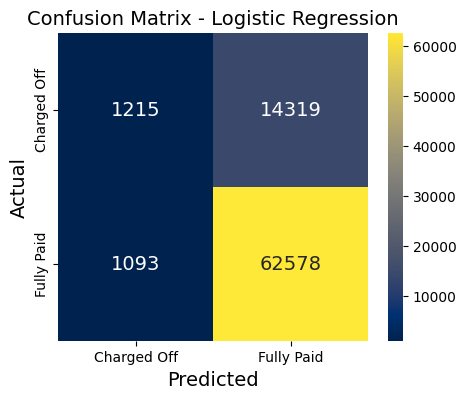

In [70]:
# Modelo 1: Regresión Logística
log_reg = LogisticRegression(max_iter=1000)
train_and_evaluate(log_reg, "Logistic Regression")


Model: Random Forest
              precision    recall  f1-score   support

           0       0.45      0.12      0.19     15534
           1       0.82      0.96      0.89     63671

    accuracy                           0.80     79205
   macro avg       0.63      0.54      0.54     79205
weighted avg       0.75      0.80      0.75     79205



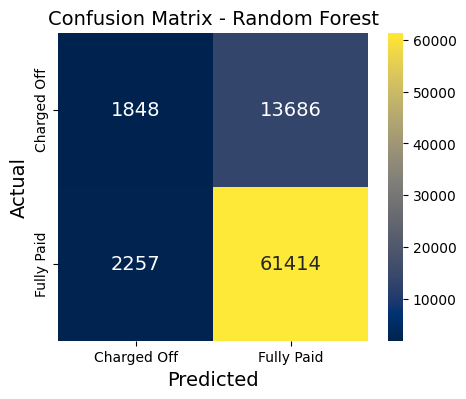

In [71]:
# Modelo 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate(rf, "Random Forest")


Model: XGBoost
              precision    recall  f1-score   support

           0       0.53      0.08      0.15     15534
           1       0.81      0.98      0.89     63671

    accuracy                           0.81     79205
   macro avg       0.67      0.53      0.52     79205
weighted avg       0.76      0.81      0.74     79205



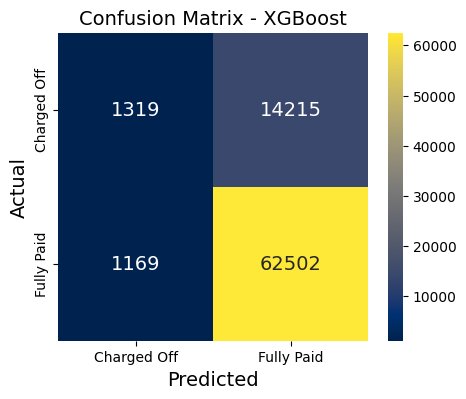

In [72]:
# Modelo 3: XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True)
train_and_evaluate(xgb, "XGBoost")

## 17.2. Modelos (Logistic Regression, Random Forrest, Xgboost) con `SMOTE`

In [68]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

In [69]:
y_train_SMOTE.value_counts(True)

loan_status
1    0.5
0    0.5
Name: proportion, dtype: float64

In [70]:
# Función para entrenar y evaluar modelos con SMOTE
def train_and_evaluate_SMOTE(model, name):
    model.fit(X_train_SMOTE, y_train_SMOTE)
    y_pred = model.predict(X_test)
    
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', xticklabels=['Charged Off', 'Fully Paid'], yticklabels=['Charged Off', 'Fully Paid'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


Model: Logistic Regression with SMOTE
Accuracy: 0.6815731330092797
              precision    recall  f1-score   support

           0       0.33      0.58      0.42     15534
           1       0.87      0.71      0.78     63671

    accuracy                           0.68     79205
   macro avg       0.60      0.64      0.60     79205
weighted avg       0.77      0.68      0.71     79205



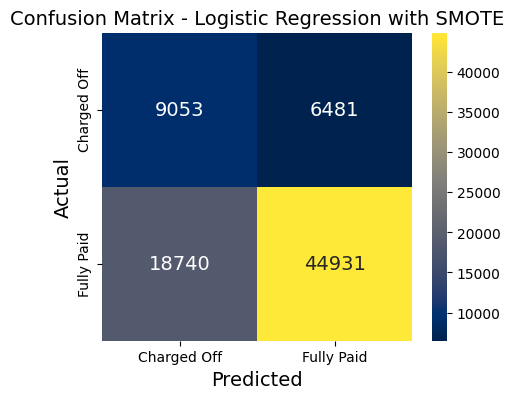

In [71]:
# Modelo 4: Regresión Logística con SMOTE
log_reg_SMOTE = LogisticRegression(max_iter=1000)
train_and_evaluate_SMOTE(log_reg_SMOTE, "Logistic Regression with SMOTE")


Model: Random Forest with SMOTE
Accuracy: 0.7498011489173664
              precision    recall  f1-score   support

           0       0.35      0.32      0.33     15534
           1       0.84      0.85      0.85     63671

    accuracy                           0.75     79205
   macro avg       0.59      0.59      0.59     79205
weighted avg       0.74      0.75      0.75     79205



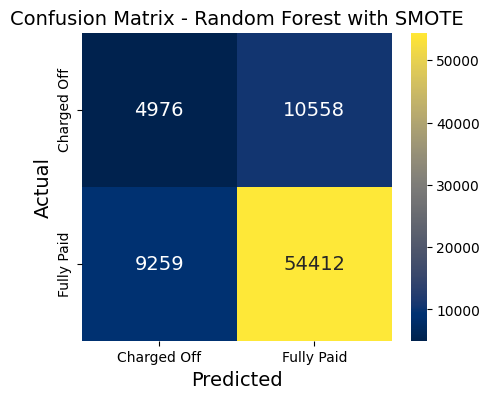

In [72]:
# Modelo 5: Random Forest con SMOTE
rf_SMOTE = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate_SMOTE(rf_SMOTE, "Random Forest with SMOTE")


Model: XGBoost with SMOTE
Accuracy: 0.7470740483555331
              precision    recall  f1-score   support

           0       0.37      0.40      0.38     15534
           1       0.85      0.83      0.84     63671

    accuracy                           0.75     79205
   macro avg       0.61      0.62      0.61     79205
weighted avg       0.76      0.75      0.75     79205



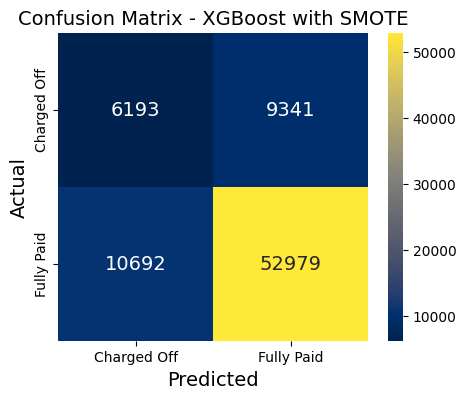

In [73]:
# Modelo 6: XGBoost con SMOTE
xgb_SMOTE = XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True)
train_and_evaluate_SMOTE(xgb_SMOTE, "XGBoost with SMOTE")

## 17.3. Evaluamos Modelos

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [76]:
# Resultados iniciales de los modelos base (creamos un diccionario para después poder hacer una tabla de comparación)
model_results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"], 
            #   "Logistic Regression with SMOTE", "Random Forest with SMOTE", "XGBoost with SMOTE"],
    # "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

In [77]:
# Evaluar los modelos base sin SMOTE
for name, model in [("Logistic Regression", log_reg), ("Random Forest", rf), ("XGBoost", xgb)]:
    y_pred = model.predict(X_test)
    # model_results["Accuracy"].append(accuracy_score(y_test, y_pred))
    model_results["Precision"].append(precision_score(y_test, y_pred, pos_label=0))  
    model_results["Recall"].append(recall_score(y_test, y_pred, pos_label=0))        
    model_results["F1-Score"].append(f1_score(y_test, y_pred, pos_label=0)) 

In [ ]:
# Evaluar los modelos con SMOTE
for name, model in [("Logistic Regression with SMOTE", log_reg_SMOTE), 
                    ("Random Forest with SMOTE", rf_SMOTE), 
                    ("XGBoost with SMOTE", xgb_SMOTE)]:
    y_pred = model.predict(X_test)
    # model_results["Accuracy"].append(accuracy_score(y_test, y_pred))
    model_results["Precision"].append(precision_score(y_test, y_pred, pos_label=0))  # Cambiado a clase 0
    model_results["Recall"].append(recall_score(y_test, y_pred, pos_label=0))        # Cambiado a clase 0
    model_results["F1-Score"].append(f1_score(y_test, y_pred, pos_label=0))

In [78]:
resultados = pd.DataFrame(model_results)
resultados

,Model,Precision,Recall,F1-Score
0,Logistic Regression,0.526430,0.078216,0.136195
1,Random Forest,0.450183,0.118965,0.188197
2,XGBoost,0.530145,0.084911,0.146377


# 18. Optimización de Hiperparámetros

In [84]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

## 18.1. Optimización `sin SMOTE`

In [85]:
# Definir hiperparámetros
param_grid = {
    'logreg': {
        'C': np.logspace(-4, 4, 10),  # Menos valores para acelerar
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'random_forest': {
        'n_estimators': [100, 300, 500],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'xgb': {
        'n_estimators': [100, 300, 500],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }
}

In [86]:
def optimize_model_not_smote(X_train, y_train, model_name):
    model_dict = {
        'logreg': LogisticRegression(max_iter=1000, random_state=42),
        'random_forest': RandomForestClassifier(random_state=42, class_weight="balanced"),
        'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss', tree_method='hist', n_jobs=-1, random_state=42)
    }
    
    model = model_dict[model_name]
    
    # Cross-validation estratificada
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    search = GridSearchCV(model, param_grid[model_name], cv=cv, scoring='balanced_accuracy', n_jobs=-1)
    search.fit(X_train, y_train)
    return search.best_params_, search.best_score_


In [87]:
results_not_smote = []
models = ['logreg', 'random_forest', 'xgb']

for model in models:
    best_params, _ = optimize_model_not_smote(X_train, y_train, model)  # Obtener mejores hiperparámetros
    
    # Instanciar el modelo con los mejores hiperparámetros
    model_dict = {
        'logreg': LogisticRegression(**best_params, max_iter=1000, random_state=42),
        'random_forest': RandomForestClassifier(**best_params, random_state=42, class_weight="balanced"),
        'xgb': XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', tree_method='hist', n_jobs=-1, random_state=42)
    }
    
    best_model = model_dict[model]
    best_model.fit(X_train, y_train)  # Entrenar modelo con los mejores hiperparámetros
    y_pred = best_model.predict(X_test)  # Predecir con el modelo entrenado
    
    results_not_smote.append({
        'Model': model,
        'Best Params': best_params,
        # 'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, pos_label=0),
        'Recall': recall_score(y_test, y_pred, pos_label=0),
        'F1-Score': f1_score(y_test, y_pred, pos_label=0)
    })

KeyboardInterrupt: 

In [ ]:
results_df_not_smote = pd.DataFrame(results_not_smote)
results_df_not_smote

## 18.2. Optimización `con SMOTE`

In [ ]:
# def optimize_model_with_smote(X_train_SMOTE, y_train_SMOTE, model_name):
#     model_dict = {
#         'logreg': LogisticRegression(max_iter=1000, random_state=42),
#         'random_forest': RandomForestClassifier(random_state=42, class_weight="balanced"),
#         'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss', tree_method='hist', n_jobs=-1, random_state=42)
#     }
    
#     model = model_dict[model_name]
    
#     # Cross-validation estratificada
#     cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#     search = GridSearchCV(model, param_grid[model_name], cv=cv, scoring='balanced_accuracy', n_jobs=-1)
#     search.fit(X_train_SMOTE, y_train_SMOTE)
#     return search.best_params_, search.best_score_

In [ ]:
# # Ejecutar optimización para los tres modelos
# results_with_smote = []
# models = ['logreg', 'random_forest', 'xgb']
# for model in models:
#     best_params, best_score = optimize_model_not_smote(X_train_SMOTE, y_train_SMOTE, model)
#     results_with_smote.append({
#         'Model': model,
#         'Best Params': best_params,
#         'Best Score (Recall)': best_score
#     })

In [ ]:
# results_df_with_smote = pd.DataFrame(results_with_smote)
# results_df_with_smote